In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
df = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

    

A1. If your project deals with a regression problem, please use one attribute of your dataset 
(X_train) along with the target values (y_train) for training a linear regression model. Sample code 
suggested below.


In [147]:
X = df["age"]
y = df["bmi"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split([[i] for i in X.values],y,test_size=0.3)

In [ ]:
reg = LinearRegression().fit(X_train,y_train)
y_train_pred = reg.predict(X_test)

A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. 
Perform prediction on the test data and compare the metric values between train and test set

In [154]:
print("MSE",mean_squared_error(y_test,y_train_pred))
print("RMSE",mean_squared_error(y_test,y_train_pred,squared=False))
print("MAPE",mean_absolute_percentage_error(y_test,y_train_pred))
print("R2",r2_score(y_test,y_train_pred))

MSE 13.445554895087561
RMSE 3.6668180886277355
MAPE 0.125775098821941
R2 0.004901993281323791


A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes.


In [156]:
X = df[["age","weight"]]

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y,test_size=0.3)

In [160]:
reg = LinearRegression().fit(X_train,y_train)
y_train_pred = reg.predict(X_test)

In [161]:
print("MSE",mean_squared_error(y_test,y_train_pred))
print("RMSE",mean_squared_error(y_test,y_train_pred,squared=False))
print("MAPE",mean_absolute_percentage_error(y_test,y_train_pred))
print("R2",r2_score(y_test,y_train_pred))

MSE 4.493349742076937
RMSE 2.119752283187103
MAPE 0.07095885843999
R2 0.6851710317813604


A4. Perform k-means clustering on your data. Please remove / ignore the target variable for 
performing clustering. 

In [163]:
kmeans=  KMeans(n_clusters = 2,random_state=0,n_init="auto").fit(X_train)

In [164]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [165]:
kmeans.cluster_centers_

array([[66.49753347, 60.3518957 ],
       [41.31984078, 63.37902021]])

A5. For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [174]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
print("Silhouette_score",silhouette_score(X_train, kmeans.labels_))
print("Calinski Harabasz score",calinski_harabasz_score(X_train, kmeans.labels_))
print("Davies Bouldin score",davies_bouldin_score(X_train, kmeans.labels_))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette_score 0.3883396451199463
Calinski Harabasz score 2994.1935857446156
Davies Bouldin score 1.0496085227310976


A6. Perform k-means clustering for different values of k. Evaluate the above scores for each k value. 
Make a plot of the values against the k value to determine the optimal cluster count.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

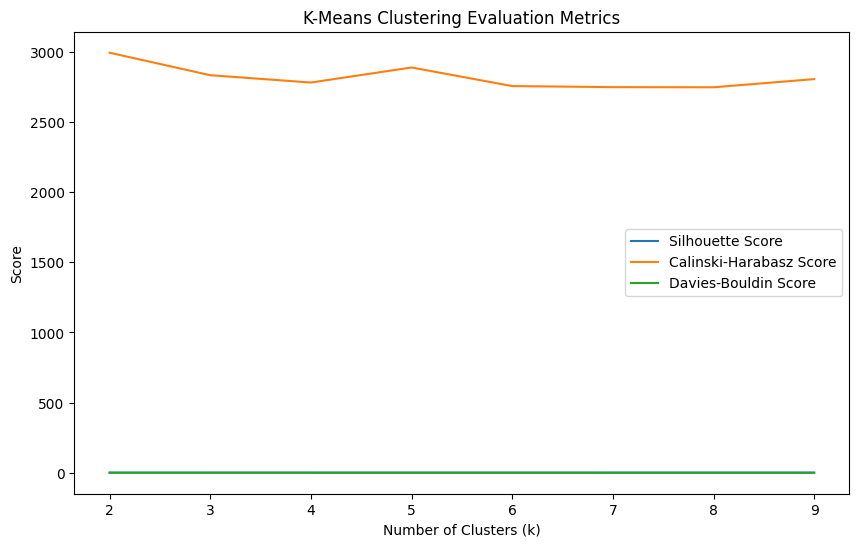

In [176]:
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_train, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_train, labels))
plt.figure(figsize=(10, 6))
plt.plot(range(2,10), silhouette_scores, label="Silhouette Score")
plt.plot(range(2,10), calinski_harabasz_scores, label="Calinski-Harabasz Score")
plt.plot(range(2,10), davies_bouldin_scores, label="Davies-Bouldin Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("K-Means Clustering Evaluation Metrics")
plt.legend()
plt.show()

A7. Using elbow plot, determine the optimal k value for k-means clustering.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

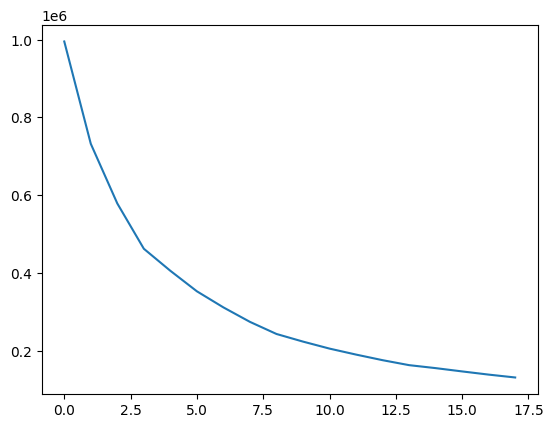

In [173]:
distortions = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    distortions.append(kmeans.inertia_)
plt.plot(distortions)